In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
"""
Imports
"""

from config import config
from utils import *

import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import lightning as L
import lightning.pytorch as pl

torch.set_float32_matmul_precision('medium')

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

log_level: WARNING
image_size:
- 320
- 440
dirs:
  data: /home/stud/ath/ath_ws/others/data
  output: /home/stud/ath/ath_ws/others/document_denoiser/output
  test_images: ${dirs.output}/test_images
  val_images: ${dirs.output}/val_images
train:
  train_batch_size: 4
  val_batch_size: 4
  max_epochs: 20
  check_val_every_n_epoch: 4
  num_sanity_val_steps: 1
  log_every_n_steps: 5
  accumulate_grad_batches: 2
  learning_rate: 0.0001
test:
  batch_size: 4



# Check Data Module

In [13]:
from dataset import DocumentDataModule
dm = DocumentDataModule()

In [14]:
dm.setup(stage='fit')

In [15]:
dl = dm.train_dataloader()
batch = next(iter(dl))

In [16]:
X_noisy, X = batch
X_noisy.shape, X.shape

(torch.Size([4, 1, 320, 440]), torch.Size([4, 1, 320, 440]))

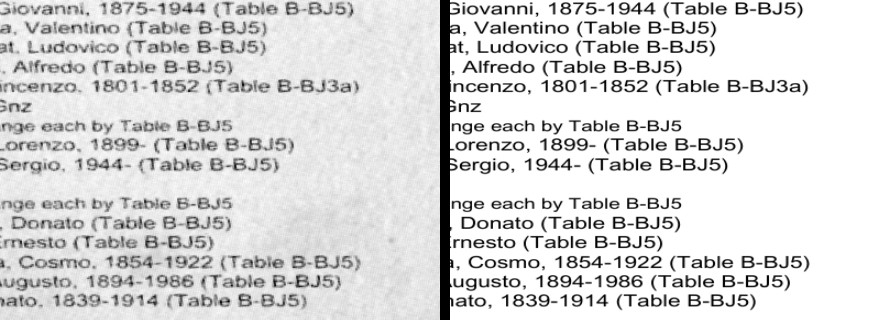

In [17]:
create_side_by_side_image(X_noisy[0], X[0])

# Check Model

In [10]:
samples = torch.randn_like(X_noisy)
samples.shape

torch.Size([2, 1, 420, 540])

In [29]:
from model import DocumentDenoiser
model = DocumentDenoiser()

In [30]:
out = model(samples)
out.shape

INFO     | forward | Input shape: torch.Size([2, 1, 420, 540])
INFO     | forward | After first ResidualBlock: torch.Size([2, 64, 420, 540])
INFO     | forward | After second ResidualBlock: torch.Size([2, 128, 210, 270])
INFO     | forward | After third ResidualBlock: torch.Size([2, 256, 105, 135])
INFO     | forward | After fourth ResidualBlock (encoder end): torch.Size([2, 512, 52, 67])
INFO     | forward | After first ConvTranspose2d: torch.Size([2, 256, 104, 134])
INFO     | forward | After first ResidualBlock in decoder: torch.Size([2, 256, 104, 134])
INFO     | forward | After second ConvTranspose2d: torch.Size([2, 128, 208, 268])
INFO     | forward | After second ResidualBlock in decoder: torch.Size([2, 128, 208, 268])
INFO     | forward | After third ConvTranspose2d: torch.Size([2, 64, 416, 536])
INFO     | forward | After third ResidualBlock in decoder: torch.Size([2, 64, 416, 536])
INFO     | forward | After final Conv2d (output): torch.Size([2, 1, 416, 536])
INFO     | forwa

torch.Size([2, 1, 420, 540])

In [31]:
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
total_trainable_params

7101249